# **Education and Internet Data Trends in the USA.**

---
# **Internet Data Processing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/DSA 210 Project Files/Education and Internet/internet data.xlsx'
df_internet = pd.read_excel(file_path, skiprows=4)

df_internet = df_internet.dropna(axis=1, how='all')

df_internet_melted = df_internet.melt(
    id_vars=['Country Name'],
    value_vars=[col for col in df_internet.columns if isinstance(col, int)],
    var_name='Year',
    value_name='Internet Users (%)'
)

# Convert Year to int
df_internet_melted['Year'] = df_internet_melted['Year'].astype(int)

df_internet_melted

Mounted at /content/drive


,Country Name,Year,Internet Users (%)
0,United States,1990,0.784729
1,United States,1991,1.163194
2,United States,1992,1.724203
3,United States,1993,2.271673
4,United States,1994,4.862781
5,United States,1995,9.237088
6,United States,1996,16.419353
7,United States,1997,21.616401
8,United States,1998,30.093197
9,United States,1999,35.848724


---
# **SAT Scores Data Processing**

In [ ]:
file_path = '/content/drive/MyDrive/DSA 210 Project Files/Education and Internet/sat scores.xlsx'
df_sat = pd.read_excel(file_path, skiprows=0)

import numpy as np

# Replace '-' with NaN so we can treat them as missing values
df_sat[['Critical Reading', 'Writing']] = df_sat[['Critical Reading', 'Writing']].replace('-', np.nan)

# Convert to numeric (in case the columns are still strings)
df_sat[['Critical Reading', 'Writing']] = df_sat[['Critical Reading', 'Writing']].apply(pd.to_numeric, errors='coerce')

# Compute row-wise average, skipping NaNs
df_sat['Critical Reading and writing'] = df_sat[['Critical Reading', 'Writing']].mean(axis=1, skipna=True)

df_sat = df_sat.drop(columns=['Critical Reading', 'Writing'])

df_sat

,Year,Math,Critical Reading and writing
0,1972,509,530.0
1,1973,506,523.0
2,1974,505,521.0
3,1975,498,512.0
4,1976,497,509.0
5,1977,496,507.0
6,1978,494,507.0
7,1979,493,505.0
8,1980,492,502.0
9,1981,492,502.0


---
# **Processing Of Average Mathematics Test Scores of 9 year old and 13 year old students**

In [ ]:
file_path = '/content/drive/MyDrive/DSA 210 Project Files/Education and Internet/edu data.xlsx'
df_scores = pd.read_excel(file_path, skiprows=2)

# Convert column names to strings to avoid the error
df_scores.columns = df_scores.columns.map(str)

# Now drop all columns that start with "Unnamed"
df_scores = df_scores.loc[:, ~df_scores.columns.str.contains('^Unnamed')]

nine_yr_olds = df_scores.iloc[[3], :]

thirteen_yr_olds = df_scores.iloc[[15], :]

#########################

# Step 2: Melt the dataframe
thirteen_long = thirteen_yr_olds.melt(
    id_vars=['Selected student characteristic'],
    var_name='Year',
    value_name='Score (13yo)'
)

# Step 3: Clean up 'Year' and 'Score' columns
thirteen_long['Year'] = thirteen_long['Year'].str.extract(r'(\d{4})')  # Extract 4-digit years
thirteen_long['Year'] = pd.to_numeric(thirteen_long['Year'], errors='coerce')

thirteen_long['Score (13yo)'] = pd.to_numeric(thirteen_long['Score (13yo)'], errors='coerce')
thirteen_long.drop(columns=['Selected student characteristic'], inplace=True)

######################

# Step 2: Melt the dataframe
nine_long = nine_yr_olds.melt(
    id_vars=['Selected student characteristic'],
    var_name='Year',
    value_name='Score (9yo)'
)

# Step 3: Clean up 'Year' and 'Score' columns
nine_long['Year'] = nine_long['Year'].str.extract(r'(\d{4})')
nine_long['Year'] = pd.to_numeric(nine_long['Year'], errors='coerce')

nine_long['Score (9yo)'] = pd.to_numeric(nine_long['Score (9yo)'], errors='coerce')
nine_long.drop(columns=['Selected student characteristic'], inplace=True)
nine_long.dropna(inplace=True)

print(nine_long)
print(thirteen_long)


    Year  Score (9yo)
0   1973   219.000000
1   1978   218.597841
2   1982   218.979757
3   1986   221.706916
4   1990   229.636073
5   1992   229.599411
6   1994   231.084969
7   1996   230.967749
8   1999   232.011440
9   2004   241.231983
10  2008   242.862190
11  2012   243.986091
12  2020   241.354943
13  2022   233.924748
    Year  Score (13yo)
0   1973    266.000000
1   1978    264.126852
2   1982    268.625183
3   1986    268.982883
4   1990    270.401752
5   1992    273.074713
6   1994    274.332046
7   1996    274.298361
8   1999    275.849411
9   2004    281.002731
10  2008    281.457771
11  2012    284.999117
12  2020    279.720724
13  2022           NaN
14  2023    270.698896


---
# **Merging all data into one data frame**

In [ ]:
# Start with a full range of years
all_years = pd.DataFrame({'Year': list(range(1990, 2024))})

# Merge each dataset one by one
df_merged = all_years.merge(df_internet_melted[['Year', 'Internet Users (%)']], on='Year', how='left')
df_merged = df_merged.merge(df_sat, on='Year', how='left')
df_merged = df_merged.merge(thirteen_long[['Year', 'Score (13yo)']], on='Year', how='left')
df_merged = df_merged.merge(nine_long[['Year', 'Score (9yo)']], on='Year', how='left')

# Forward fill NaN values (fill with previous year's data)
df_merged = df_merged.ffill()

# Backward fill if the first row has NaN (fill with next year's data)
df_merged = df_merged.bfill()

df_merged

,Year,Internet Users (%),Math,Critical Reading and writing,Score (13yo),Score (9yo)
0,1990,0.784729,501,500.0,270.401752,229.636073
1,1991,1.163194,500,499.0,270.401752,229.636073
2,1992,1.724203,501,500.0,273.074713,229.599411
3,1993,2.271673,503,500.0,273.074713,229.599411
4,1994,4.862781,504,499.0,274.332046,231.084969
5,1995,9.237088,506,504.0,274.332046,231.084969
6,1996,16.419353,508,505.0,274.298361,230.967749
7,1997,21.616401,511,505.0,274.298361,230.967749
8,1998,30.093197,512,505.0,274.298361,230.967749
9,1999,35.848724,511,505.0,275.849411,232.011440


---
# Machine Learning
## Linear Regresseion

# Regression Analysis: Internet Users (%) vs. Academic Performance

## Key Findings Summary
| Test Category              | Slope   | Baseline (Intercept) | R²    | Prediction Error (RMSE) | CV R² (Stability)       |
|----------------------------|---------|----------------------|-------|-------------------------|-------------------------|
| **Math**                   | 0.188   | 503.2                | 0.600 | ±4.89 points            | 0.441 ± 0.436           |
| **Critical Reading/Writing** | 0.165 | 496.5                | 0.152 | ±12.44 points           | 0.091 ± 0.232           |
| **13-Year-Old Scores**      | 0.111   | 272.5                | 0.543 | ±3.23 points            | 0.158 ± 0.309           |
| **9-Year-Old Scores**       | 0.145   | 229.2                | 0.620 | ±3.62 points            | 0.207 ± 0.169           |

---

## Interpretation of Results

### 1. Math Performance
- **Strongest Relationship** (R²=0.60):
  - Each 1% Internet increase → **+0.19 points**
  - 10% more Internet → **+1.9 point gain** (e.g., 503 → 505)
- **High Stability:** Cross-validated R²=0.44 suggests model generalizes reasonably well

### 2. Critical Reading/Writing
- **Weakest Link** (R²=0.15):
  - Internet explains only 15% of score variance
  - Large prediction error (±12.4 points)
  - Possible explanation: Reading/writing depend more on offline practice

### 3. Age Comparison
- **9-Year-Olds Benefit More**:
  - Stronger slope (0.145 vs 0.111) and R² (0.62 vs 0.54) than 13-year-olds
  - Suggests Internet access has greater impact during foundational learning stages

---

## Educational Implications
✅ **Positive Findings:**
- Internet access moderately supports **math skills** and **elementary education**
- Digital tools may help close gaps in early STEM learning

⚠️ **Areas for Concern:**
- Negligible impact on **language arts** (reading/writing)
- Adolescent (13yo) benefits plateau faster than younger children


=== Math ===
Slope: 0.1884
Intercept: 503.2055
R2 Score: 0.6000
MAE: 3.7467
RMSE: 4.8948
Cross-Validated R2: 0.4413 ± 0.4358

=== Critical Reading and writing ===
Slope: 0.1653
Intercept: 496.5211
R2 Score: 0.1516
MAE: 9.8101
RMSE: 12.4387
Cross-Validated R2: 0.0906 ± 0.2321

=== Score (13yo) ===
Slope: 0.1105
Intercept: 272.4708
R2 Score: 0.5429
MAE: 2.3428
RMSE: 3.2260
Cross-Validated R2: 0.1583 ± 0.3089

=== Score (9yo) ===
Slope: 0.1452
Intercept: 229.1724
R2 Score: 0.6196
MAE: 2.8724
RMSE: 3.6210
Cross-Validated R2: 0.2068 ± 0.1693


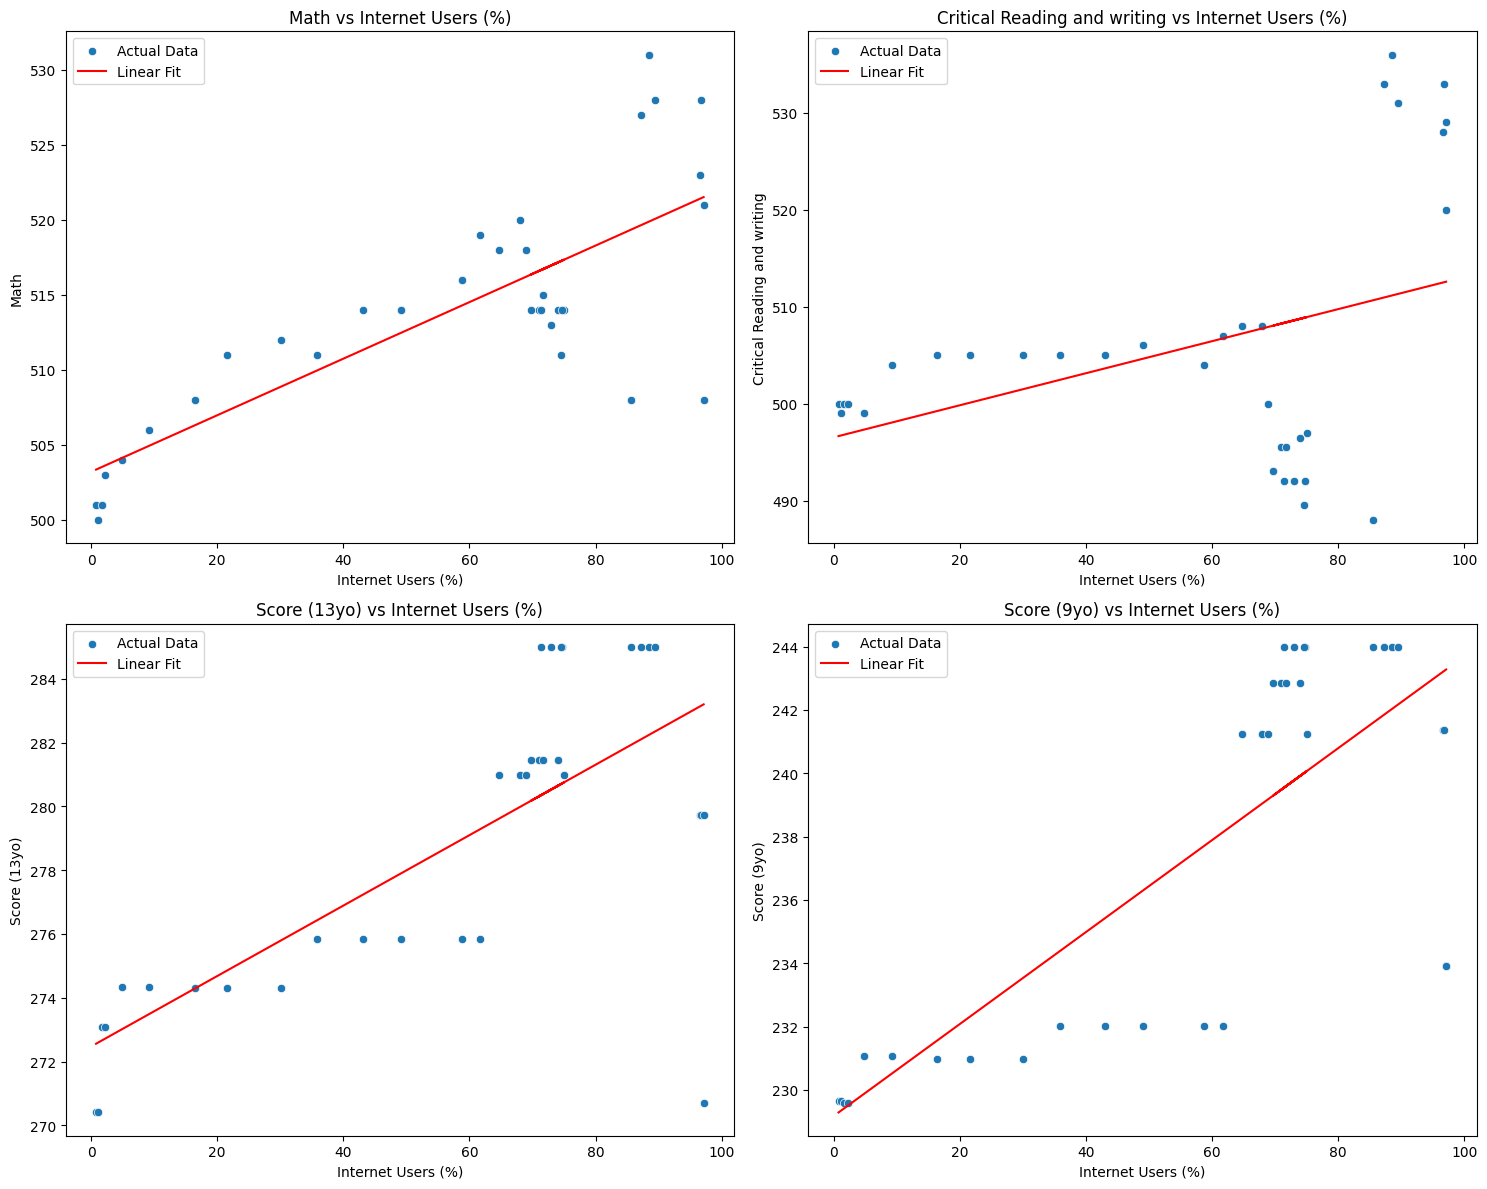

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# === Features and Targets ===
X = df_merged[['Internet Users (%)']]
targets = ['Math', 'Critical Reading and writing', 'Score (13yo)', 'Score (9yo)']

# === Initialize model and CV ===
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# === Fit and Evaluate ===
for target in targets:
    y = df_merged[target]
    model.fit(X, y)
    y_pred = model.predict(X)

    # Metrics
    r2 = r2_score(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    slope = model.coef_[0]
    intercept = model.intercept_

    print(f"\n=== {target} ===")
    print(f"Slope: {slope:.4f}")
    print(f"Intercept: {intercept:.4f}")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")

    # Cross-validated R2
    cv_r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
    print(f"Cross-Validated R2: {np.mean(cv_r2_scores):.4f} ± {np.std(cv_r2_scores):.4f}")

    import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

features = ['Internet Users (%)']
targets = ['Math', 'Critical Reading and writing', 'Score (13yo)', 'Score (9yo)']

plt.figure(figsize=(15, 12))

for i, target in enumerate(targets, 1):
    X = df_merged[['Internet Users (%)']].values
    y = df_merged[target].values

    # Fit linear regression
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Plot data points
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df_merged['Internet Users (%)'], y=df_merged[target], label='Actual Data')

    # Plot regression line
    plt.plot(df_merged['Internet Users (%)'], y_pred, color='red', label='Linear Fit')

    plt.title(f'{target} vs Internet Users (%)')
    plt.xlabel('Internet Users (%)')
    plt.ylabel(target)
    plt.legend()

plt.tight_layout()
plt.show()


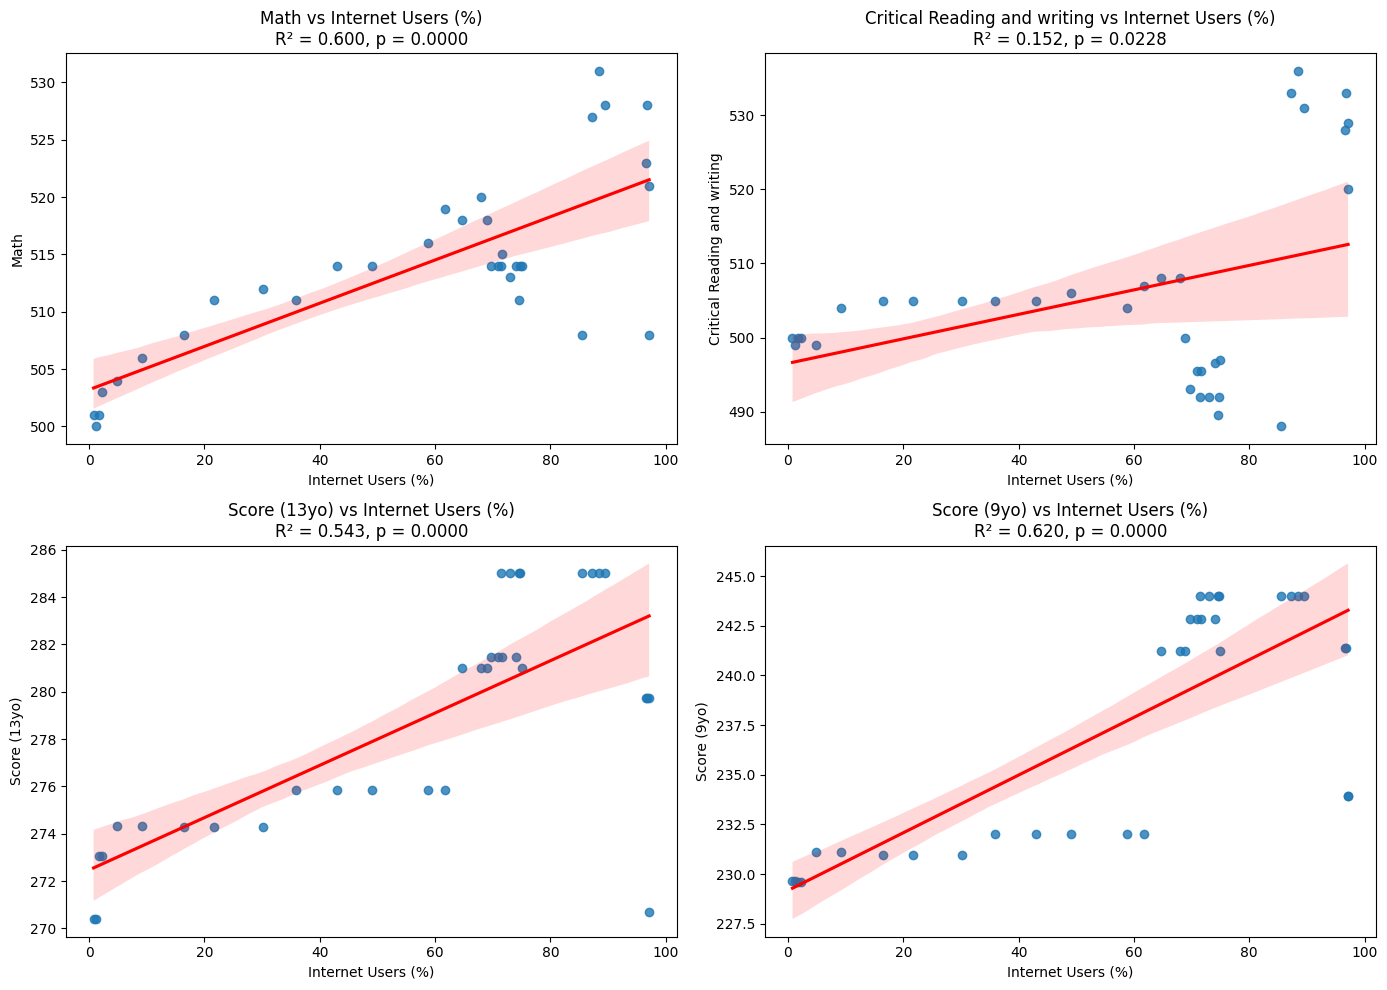


--- Regression Results for Math ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     48.01
Date:                Sun, 18 May 2025   Prob (F-statistic):           7.60e-08
Time:                        13:29:40   Log-Likelihood:                -102.24
No. Observations:                  34   AIC:                             208.5
Df Residuals:                      32   BIC:                             211.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        50

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# List of dependent variables (targets) to compare against Internet Users (%)
dependent_vars = ['Math', 'Critical Reading and writing', 'Score (13yo)', 'Score (9yo)']
independent_var = 'Internet Users (%)'

# Initialize subplots for visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

# Dictionary to store regression results
results = {}

# Loop through each dependent variable
for i, var in enumerate(dependent_vars):
    # Prepare data (drop missing values if any)
    data = df_merged[[independent_var, var]].dropna()
    X = data[independent_var].values.reshape(-1, 1)  # Feature
    y = data[var].values  # Target

    # Fit linear regression (using statsmodels for detailed summary)
    X_sm = sm.add_constant(X)  # Adds intercept term
    model = sm.OLS(y, X_sm).fit()
    results[var] = model

    # Plotting
    sns.regplot(x=independent_var, y=var, data=data, ax=axes[i], line_kws={'color': 'red'})
    axes[i].set_title(f'{var} vs {independent_var}\nR² = {model.rsquared:.3f}, p = {model.pvalues[1]:.4f}')
    axes[i].set_xlabel(independent_var)
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

# Print regression summaries
for var, model in results.items():
    print(f"\n--- Regression Results for {var} ---")
    print(model.summary())

---
# **Figures and Plots**

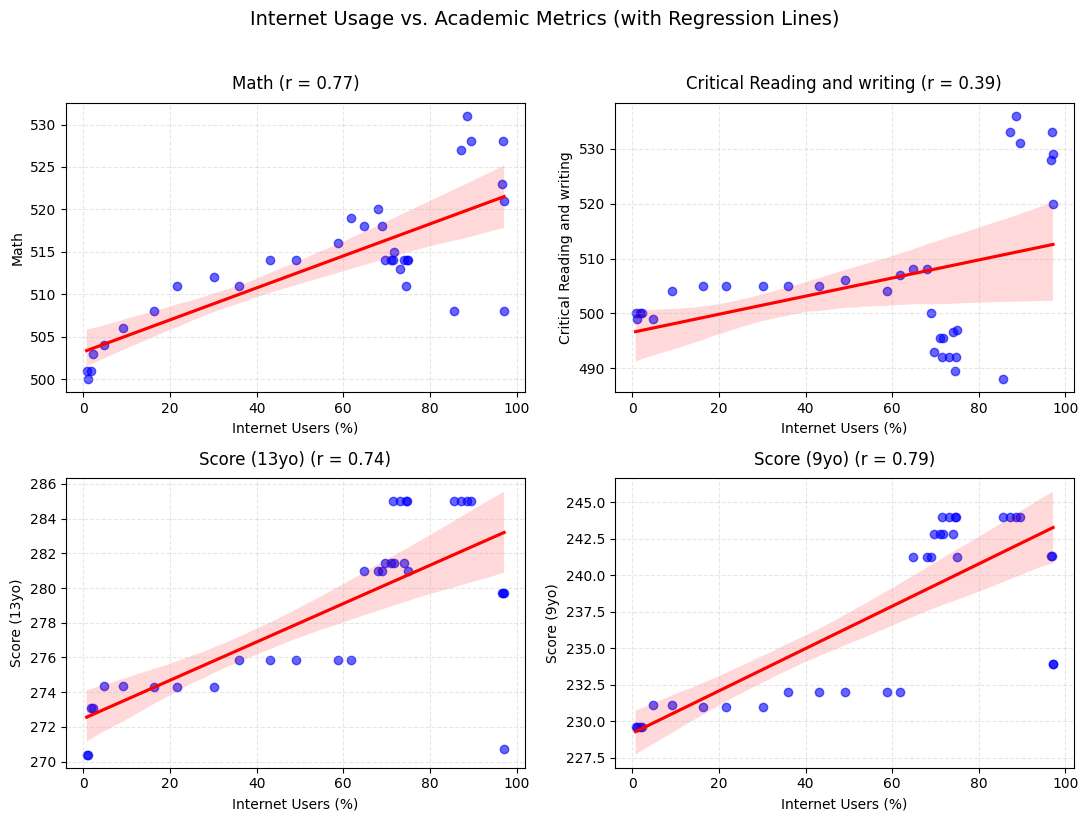

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(11, 8))
fig.suptitle('Internet Usage vs. Academic Metrics (with Regression Lines)', y=1.02, fontsize=14)

# Flatten axes for easy iteration
axes = axes.flatten()

# Columns to plot against Internet Users (%)
target_columns = ['Math', 'Critical Reading and writing', 'Score (13yo)', 'Score (9yo)']

# Create each subplot
for i, col in enumerate(target_columns):
    sns.regplot(x='Internet Users (%)', y=col, data=df,
                ax=axes[i],
                line_kws={'color': 'red'},
                scatter_kws={'alpha': 0.6, 'color': 'blue'})

    # Calculate and display Pearson correlation
    corr = df[['Internet Users (%)', col]].corr().iloc[0, 1]
    axes[i].set_title(f'{col} (r = {corr:.2f})', pad=10)
    axes[i].set_xlabel('Internet Users (%)')
    axes[i].set_ylabel(col)
    axes[i].grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

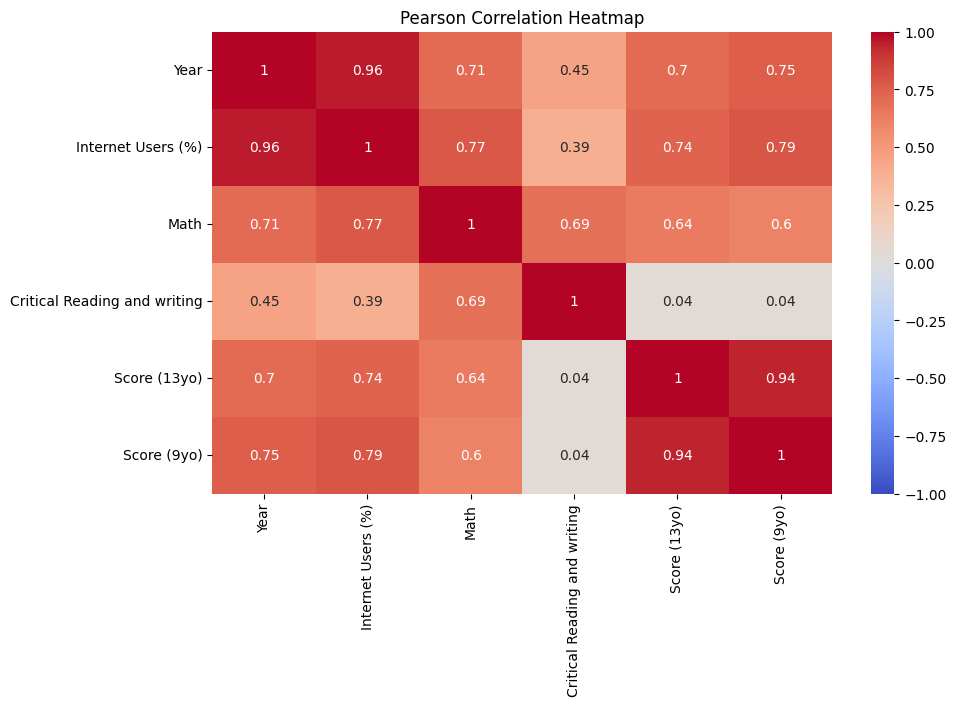

In [ ]:
# Calculate Pearson correlations
corr_matrix = df_merged.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Pearson Correlation Heatmap")
plt.show()

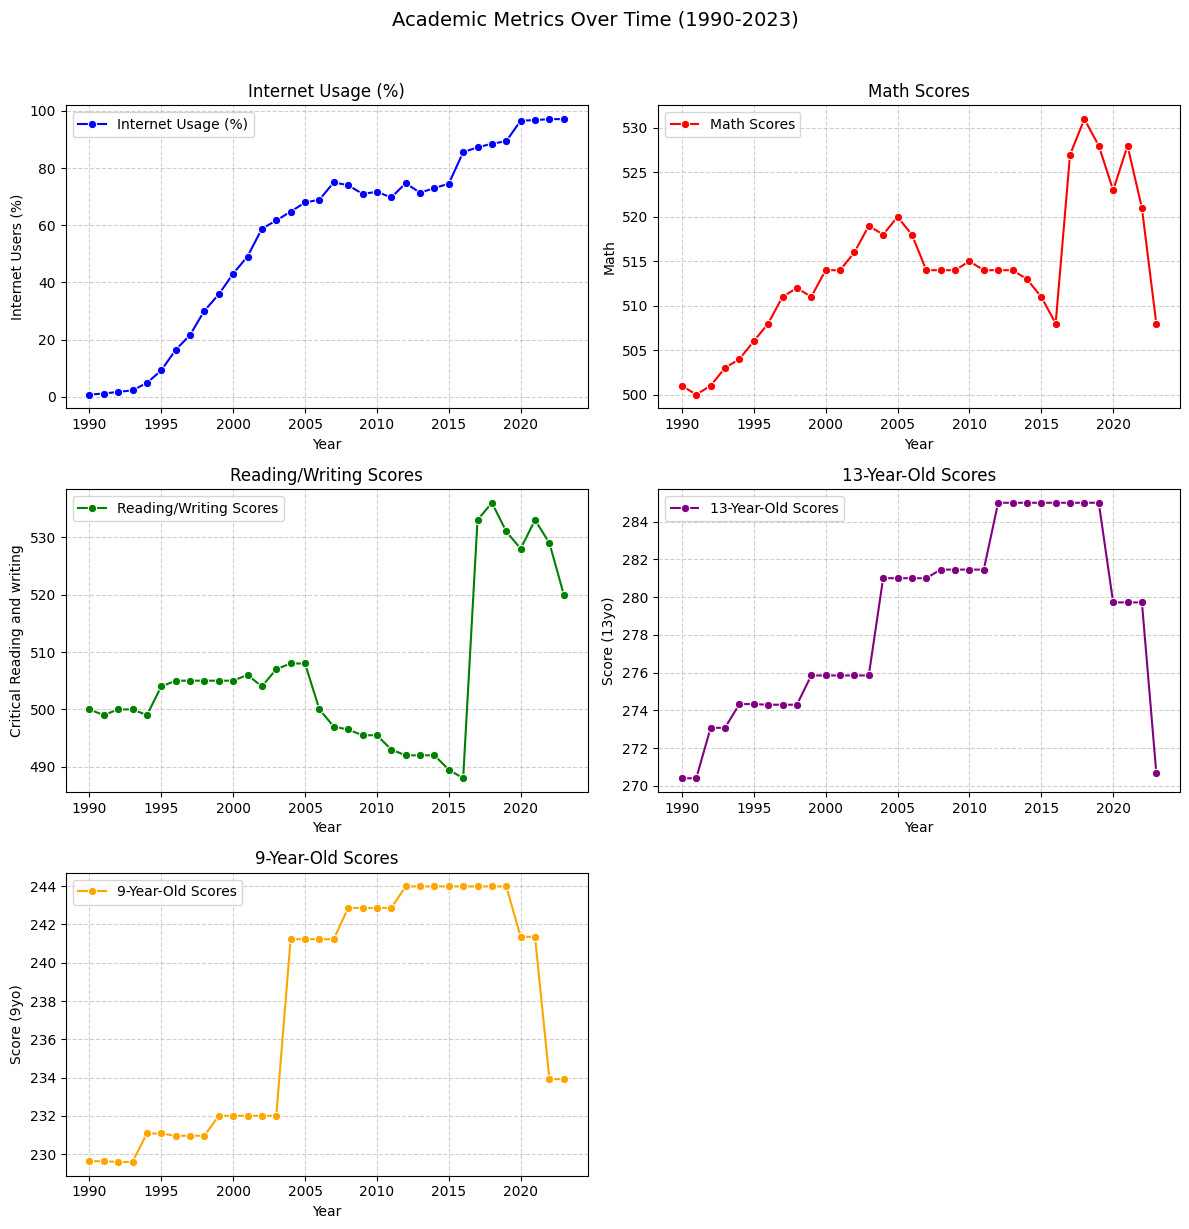

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Data to plot
metrics = [
    ('Internet Users (%)', 'blue', 'Internet Usage (%)'),
    ('Math', 'red', 'Math Scores'),
    ('Critical Reading and writing', 'green', 'Reading/Writing Scores'),
    ('Score (13yo)', 'purple', '13-Year-Old Scores'),
    ('Score (9yo)', 'orange', '9-Year-Old Scores')
]

# Calculate grid size (2 columns, dynamic rows)
n_plots = len(metrics)
n_cols = 2
n_rows = math.ceil(n_plots / n_cols)

# Create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
fig.suptitle('Academic Metrics Over Time (1990-2023)', y=1.02, fontsize=14)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each metric
for i, (col, color, title) in enumerate(metrics):
    sns.lineplot(x='Year', y=col, data=df_merged, color=color,
                ax=axes[i], marker='o', label=title)

    axes[i].set_title(title)
    axes[i].set_xlabel('Year')
    axes[i].grid(True, linestyle='--', alpha=0.6)
    axes[i].legend()

# Hide empty subplots if odd number of metrics
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()